In [42]:
import pandas as pd
import matplotlib.pyplot as plt

cereals = pd.read_csv('/Users/Pawan Kumar/Downloads/cereal.csv')
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Text(0.5, 1.0, 'Sugar Histogram')

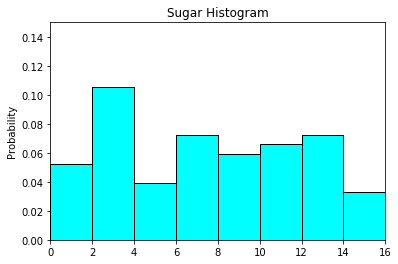

In [43]:
#  the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals
%matplotlib inline
sugar = cereals['sugars']
vitamins = cereals['vitamins']

plt.hist(sugar, edgecolor = "black",bins = [0,2,4,6,8,10,12,14,16,18] ,density = True, color = 'cyan')
plt.ylabel('Probability')
plt.axis([0, 16, 0, 0.15])
plt.title('Sugar Histogram')

Text(0.5, 1.0, 'Vitamins Histogram')

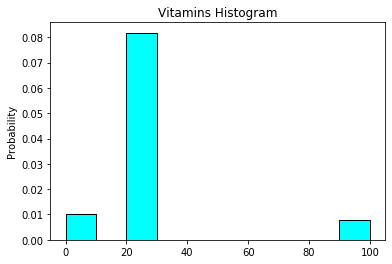

In [44]:
plt.hist(vitamins, edgecolor = "black",density = True, color = 'cyan')
plt.ylabel('Probability')
# plt.axis([0, 16, 0, 0.15])
plt.title('Vitamins Histogram')

In [47]:
# The names of the manufactures are coded using alphabets, create a new column with their fullname using the below mapping.
cereals['mfr'] = cereals.mfr.map({'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills' ,'P' :'Post' ,'A':'American Home Foods Products'})


In [48]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Raslston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


[Text(0, 0, 'Nabisco'),
 Text(0, 0, 'Quaker Oats'),
 Text(0, 0, 'Kelloggs'),
 Text(0, 0, 'Raslston Purina'),
 Text(0, 0, 'General Mills'),
 Text(0, 0, 'Post'),
 Text(0, 0, 'American Home Foods Products')]

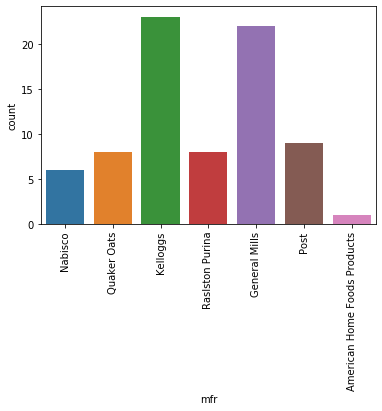

In [75]:
'''Create a bar plot where each manufacturer 
is on the y axis and the height of the bars depict the number of cereals manufactured by them'''
import seaborn as sns

chart = sns.countplot(x = cereals.mfr)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [77]:
''' Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. 

    Separate 25% of your data as test set.'''

cereals.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [79]:
y = cereals['rating']
x = cereals[['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 3856)
    

In [166]:
x_test.shape, y_test.shape

((20, 12), (20,))

In [167]:
# Model creation
lr = LinearRegression()
lr.fit(x_train, y_train)
# Prediction
y_pred = lr.predict(x_test)

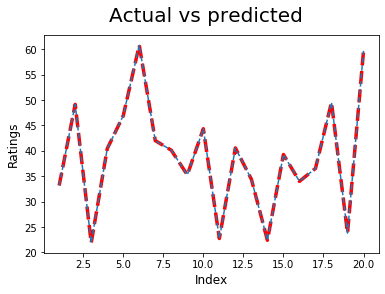

In [168]:
# Plotting
c = [i for i in range(1,21,1)]
fig = plt.figure()
plt.plot(c, y_test, color = "red", linewidth =3.5, linestyle = '--')
plt.plot(c, y_pred, linestyle = '--')
fig.suptitle('Actual vs predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 12)
plt.ylabel('Ratings', fontsize = 12)
plt.show()

Text(0, 0.5, 'Error')

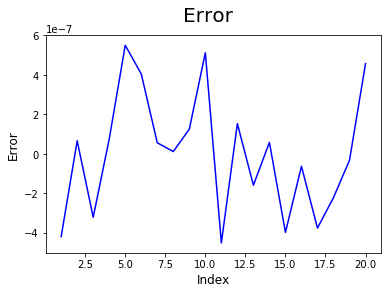

In [173]:
# Residual Plot
c = [i for i in range(1,21,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color = 'blue', linestyle = '-')
fig.suptitle('Error', fontsize = 20)
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Error', fontsize = 12)

In [170]:
# Finding the R2 or COD
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

In [171]:
Correlation = cereals.corr()

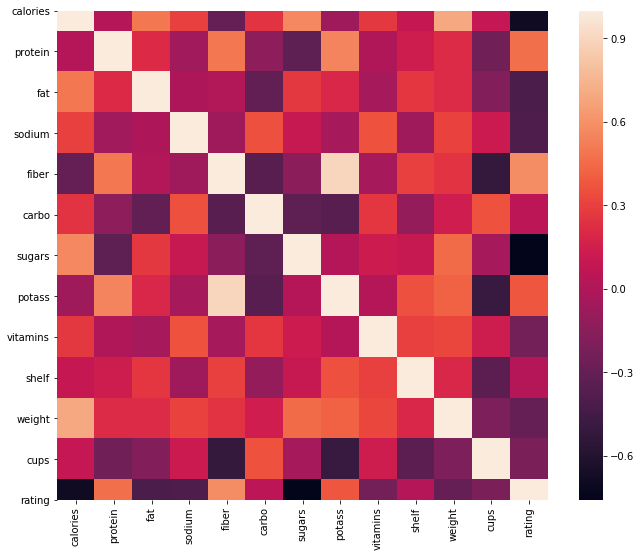

In [172]:
fig = plt.figure(figsize=(11,9))
sns.heatmap(Correlation)